In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Precision, Recall, and F1 scores

In [11]:
icd_bert = {
    'global_p': 0.8457,
    'global_r': 0.4134,
    'global_f1': 0.5553,
    'chapters_p': 0.8774,
    'chapters_r': 0.6735,
    'chapters_f1': 0.7621,
    'blocks_p': 0.7528,
    'blocks_r': 0.1782,
    'blocks_f1': 0.2882,
}

harnn = {
    'global_p': 0.6464,
    'global_r': 0.4162,
    'global_f1': 0.5063,
    'chapters_p': 0.6796,
    'chapters_r': 0.6176,
    'chapters_f1': 0.5063,
    'blocks_p': 0.3876,
    'blocks_r': 0.3164,
    'blocks_f1': 0.3484,
}

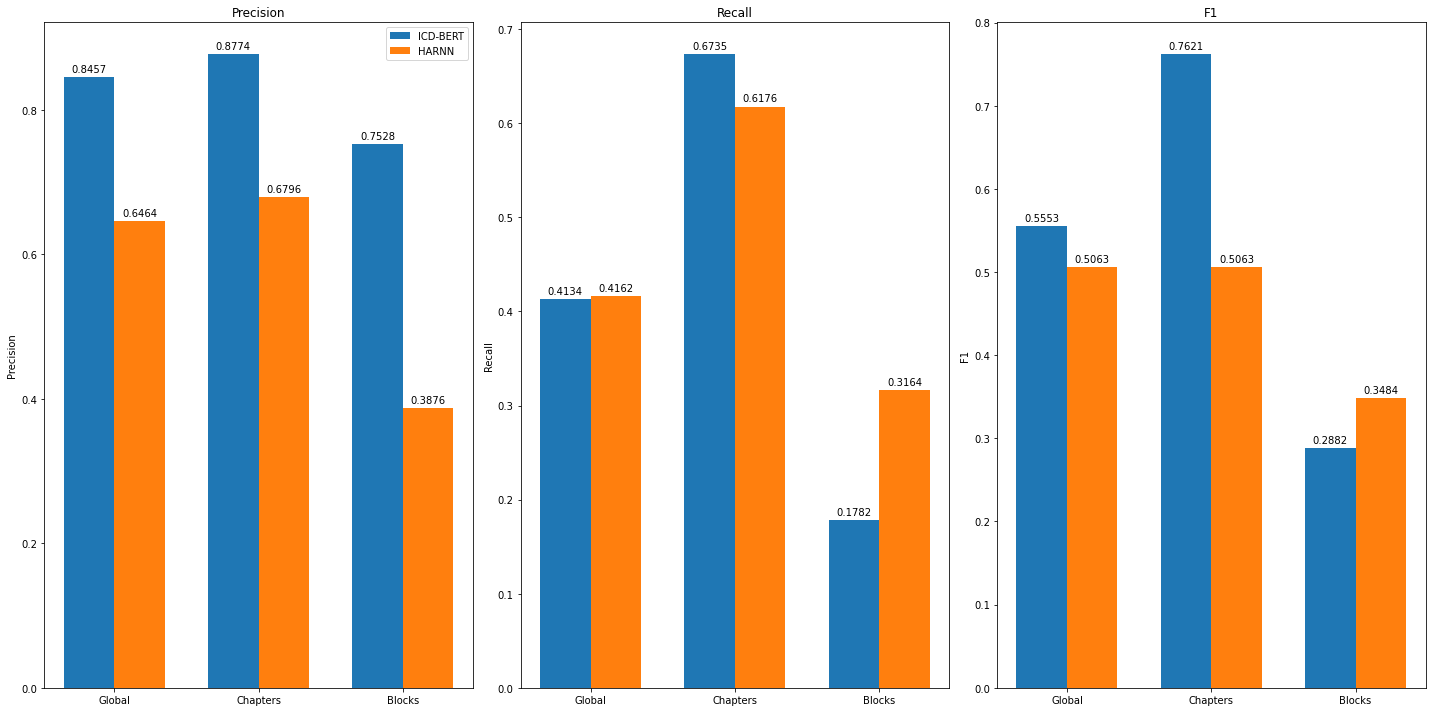

In [20]:
labels = ['Global', 'Chapters', 'Blocks']
icd_bert_precision = [icd_bert['global_p'], icd_bert['chapters_p'], icd_bert['blocks_p']]
harnn_precision = [harnn['global_p'], harnn['chapters_p'], harnn['blocks_p']]
icd_bert_recall = [icd_bert['global_r'], icd_bert['chapters_r'], icd_bert['blocks_r']]
harnn_recall = [harnn['global_r'], harnn['chapters_r'], harnn['blocks_r']]
icd_bert_f1 = [icd_bert['global_f1'], icd_bert['chapters_f1'], icd_bert['blocks_f1']]
harnn_f1 = [harnn['global_f1'], harnn['chapters_f1'], harnn['blocks_f1']]


x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

# Precision plot
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
rects1 = ax[0].bar(x - width/2, icd_bert_precision, width, label='ICD-BERT')
rects2 = ax[0].bar(x + width/2, harnn_precision, width, label='HARNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

# Recall plot
rects3 = ax[1].bar(x - width/2, icd_bert_recall, width, label='ICD-BERT')
rects4 = ax[1].bar(x + width/2, harnn_recall, width, label='HARNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall')
ax[1].set_xticks(x, labels)
#ax[1].legend()

ax[1].bar_label(rects3, padding=3)
ax[1].bar_label(rects4, padding=3)

# F1 results
rects5 = ax[2].bar(x - width/2, icd_bert_f1, width, label='ICD-BERT')
rects6 = ax[2].bar(x + width/2, harnn_f1, width, label='HARNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('F1')
ax[2].set_title('F1')
ax[2].set_xticks(x, labels)
# ax[2].legend()

ax[2].bar_label(rects5, padding=3)
ax[2].bar_label(rects6, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# make bar chart with recall scores
labels = ['Global', 'Chapters', 'Blocks']
icd_bert_recall = [icd_bert['global_r'], icd_bert['chapters_r'], icd_bert['blocks_r']]
harnn_recall = [harnn['global_r'], harnn['chapters_r'], harnn['blocks_r']]

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, icd_bert_recall, width, label='ICD-BERT')
rects2 = ax.bar(x + width/2, harnn_recall, width, label='HARNN')


### Confusion Matrix - ICD-BERT

In [5]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import json
DATA_DIR = '../../data/'
with open(DATA_DIR + '/test_predictions.json') as f:
    data = json.load(f)

In [4]:
data[0]

{'id_': '24701',
 'chapters_preds': ['XI'],
 'blocks_preds': ['K55-K64'],
 'chapters_labels': ['XI'],
 'blocks_labels': ['K90-K93']}

In [7]:
classes = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XXI']
multilabel_binarizer = MultiLabelBinarizer(classes=classes)
multilabel_binarizer.fit(classes)

MultiLabelBinarizer(classes=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII',
                             'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI',
                             'XVII', 'XVIII', 'XIX', 'XX', 'XXI'])

In [9]:
labels, preds = [], []
for d in data:
    labels.append(d['chapters_labels'])
    preds.append(d['chapters_preds'])

In [14]:
labels_transformed = multilabel_binarizer.transform(labels)
preds_transformed = multilabel_binarizer.transform(preds)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
matrix = multilabel_confusion_matrix(labels_transformed, preds_transformed)
matrix

array([[[255,   0],
        [  8,  19]],

       [[267,   1],
        [  5,   9]],

       [[275,   1],
        [  1,   5]],

       [[257,   2],
        [  7,  16]],

       [[258,   0],
        [  8,  16]],

       [[257,   3],
        [ 10,  12]],

       [[271,   3],
        [  1,   7]],

       [[280,   0],
        [  1,   1]],

       [[261,   1],
        [  2,  18]],

       [[274,   0],
        [  0,   8]],

       [[256,   1],
        [  7,  18]],

       [[265,   4],
        [  3,  10]],

       [[251,   0],
        [  9,  22]],

       [[264,   2],
        [  6,  10]],

       [[269,   1],
        [  6,   6]],

       [[269,   2],
        [ 10,   1]],

       [[255,   2],
        [  9,  16]],

       [[258,   4],
        [ 12,   8]],

       [[252,   4],
        [  4,  22]],

       [[282,   0],
        [  0,   0]],

       [[274,   1],
        [  2,   5]]])

#### Some stats about completely/partially wrong/correct preds

In [25]:
# All the times where we are fully correct with chapters but miss blocks
counter_1 = 0
for d in data:
    if d['chapters_preds'] == d['chapters_labels'] and d['blocks_preds'] != d['blocks_labels']:
        counter_1 += 1
counter_1
print(f"We're fully correct with chapters but miss blocks {counter_1} times out of {len(data)}")

We're fully correct with chapters but miss blocks 140 times out of 282


In [26]:
# All the times we get at least one chapter correct
counter_2 = 0
for d in data:
    for i in d['chapters_preds']:
        if i in d['chapters_labels']:
            counter_2 += 1
            break
counter_2
print(f"We get at least one chapter correct {counter_2} times out of {len(data)}")

We get at least one chapter correct 218 times out of 282


In [27]:
# all the times we predict everything correctly
counter_3 = 0
for d in data:
    if d['chapters_preds'] == d['chapters_labels'] and d['blocks_preds'] == d['blocks_labels']:
        counter_3 += 1
counter_3
print(f"We predict everything correctly {counter_3} times out of {len(data)}")

We predict everything correctly 43 times out of 282


In [28]:
# all the times we predict all the blocks correctly
counter_4 = 0
for d in data:
    if d['blocks_preds'] == d['blocks_labels']:
        counter_4 += 1
counter_4
print(f"We predict all the blocks correctly {counter_4} times out of {len(data)}")
# This is probably due to that we missed one chapter but only had blocks from on the chapters

We predict all the blocks correctly 44 times out of 282


In [29]:
# All the times we get at least one block correct
counter_5 = 0
for d in data:
    for i in d['blocks_preds']:
        if i in d['blocks_labels']:
            counter_5 += 1
            break
counter_5
print(f"We get at least one block correct {counter_5} times out of {len(data)}")

We get at least one block correct 63 times out of 282


In [30]:
# All the times we predict chapter(s) correctly, but don't predict any blocks
counter_6 = 0
for d in data:
    if d['chapters_preds'] == d['chapters_labels'] and d['blocks_preds'] == []:
        counter_6 += 1
counter_6
print(f"We predict chapter(s) correctly, but don't predict any blocks {counter_6} times out of {len(data)}")

We predict chapter(s) correctly, but don't predict any blocks 119 times out of 282
